In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, time, json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Had to bump this up to 3500 to get enough viable data down the line
lats = np.random.uniform(low=-90.000, high=90.000, size=3500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1132

In [35]:
# test line to get the correct keys for the datasets\n",
response = requests.get('http://api.openweathermap.org/data/2.5/weather?q=portland&units=imperial&appid=e08650aa218de36f561d54df8fd78503').json()
print(json.dumps(response, indent=2, sort_keys=True))

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 45.52,
    "lon": -122.67
  },
  "dt": 1533412560,
  "id": 5746545,
  "main": {
    "humidity": 53,
    "pressure": 1016,
    "temp": 75.67,
    "temp_max": 78.8,
    "temp_min": 73.4
  },
  "name": "Portland",
  "sys": {
    "country": "US",
    "id": 2274,
    "message": 0.005,
    "sunrise": 1533387553,
    "sunset": 1533439999,
    "type": 1
  },
  "visibility": 16093,
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04d",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 320,
    "speed": 5.82
  }
}


In [36]:
# create a dataset to hold all the information we're about to collect
file = pd.DataFrame({'City Name': cities,
                    'Name': "",
                    'Country': "",
                    'Latitude': "",
                    'Clouds': "",
                    'Humidity': "",
                    'Wind Speed': "",
                    'Wind Speed': "",
                    'Temperature': ""})

file.head(3)

,City Name,Clouds,Country,Humidity,Latitude,Name,Temperature,Wind Speed
0,cruz alta,,,,,,,
1,attawapiskat,,,,,,,
2,jamestown,,,,,,,


## Perform API Calls

In [37]:
# OpenWeatherMap API Key
# api_key = api_keys.api_key
api = 'e08650aa218de36f561d54df8fd78503'
url = 'http://api.openweathermap.org/data/2.5/weather?q='

# empty lists to hold the information collected
name = []
country = []
clouds = []
humidity = []
wind_speed = []
latitude = []
temp = []

# loop through API requests and parse necessary information, in imperial units
for index, city in file.iterrows():
    response = requests.get(url + city[0] + '&units=imperial&appid=' + api).json()
    try:
        file.loc[index, 'Name'] = response['name']
        file.loc[index, 'Country'] = response['sys']['country']
        file.loc[index, 'Clouds'] = response['clouds']['all']
        file.loc[index, 'Humidity'] = response['main']['humidity']
        file.loc[index, 'Temperature'] = response['main']['temp']
        file.loc[index, 'Wind Speed'] = response['wind']['speed']
        file.loc[index, 'Latitude'] = response['coord']['lat']
    except KeyError:
        pass

In [38]:
# double check there are enough values to satisfy the requirements
print(file['Temperature'].nunique())

508


In [39]:
# dataset for the information collected
df = pd.DataFrame({'City': file['Name'],
                    'Country': file['Country'],
                    'Latitude': file['Latitude'],
                    'Clouds': file['Clouds'],
                    'Humidity': file['Humidity'],
                    'Wind Speed': file['Wind Speed'],
                    'Temperature': file['Temperature']
                    })
df.head(3)

,City,Clouds,Country,Humidity,Latitude,Temperature,Wind Speed
0,Cruz Alta,0,AR,44,-33.01,60.58,2.82
1,,,,,,,
2,Jamestown,0,AU,44,-33.21,51.94,20.49


In [40]:
# fill blank rows in with na and drop them from the dataframe
df['Temperature'].replace('', np.nan, inplace=True)
df.dropna(subset=['Temperature'], how='any', inplace=True)

In [ ]:
(set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel())

## Temp vs Latitude Scatter Plot

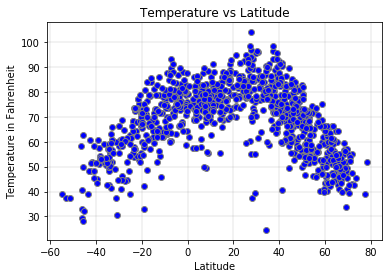

In [53]:
temp_lat = plt.scatter(df['Latitude'], df['Temperature'], s=None, marker="o", alpha=1, facecolors="blue", edgecolors="grey")

# label the plot
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature in Fahrenheit")
plt.grid(color='grey', linewidth=.2)

# Save Figure
plt.savefig("Temp_vs_Latitude.png", edgecolor='black')
plt.show()

## Humidity vs Latitude Scatter Plot

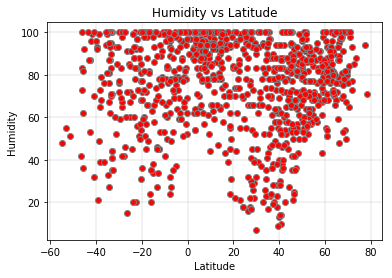

In [54]:
hum_lat = plt.scatter(df['Latitude'], df['Humidity'], s=None, marker="o", alpha=1, facecolors="red", edgecolors="grey")

# label the plot
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(color='grey', linewidth=.2)

# Save Figure
plt.savefig("Humidity_vs_Latitude.png", edgecolor='black')
plt.show()

## Cloudiness vs Latitude Scatter Plot

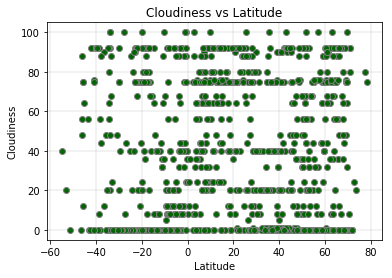

In [55]:
cloud_lat = plt.scatter(df['Latitude'], df['Clouds'], s=None, marker="o", alpha=1, facecolors="darkgreen", edgecolors="grey")

# label the plot
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(color='grey', linewidth=.2)

# Save Figure
plt.savefig("Cloudiness_vs_Latitude.png", edgecolor='black')
plt.show()

## Wind Speed vs Latitude Scatter Plot

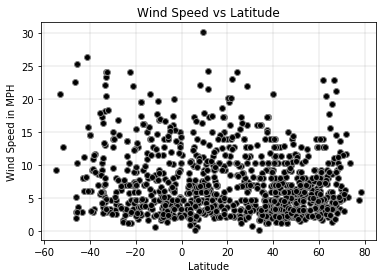

In [56]:
wind_lat = plt.scatter(df['Latitude'], df['Wind Speed'], s=None, marker="o", alpha=1, facecolors="black", edgecolors="grey")

# label the plot
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in MPH")
plt.grid(color='grey', linewidth=.2)

# Save Figure
plt.savefig("Wind_Speed_vs_Latitude.png", edgecolor='black')
plt.show()